<a href="https://colab.research.google.com/github/Neelov12/MAT-421-Computational-Methods-Integrated-into-Python/blob/main/Module_F_20_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module F: Section 20.1 - 20.4


## 20.1: Numerical Differentiation Problem Statement

In this section, I write a python program that demonstrates the concept

First, an overview of **Numerical Differentiation Problem Statement**:

For a continuous function $f(x)$, the function is expected to exist at all points predicated by the domain of x. However, in realistic computing implementations, such as in python, this representation may not always be possible. Instead, python uses a discrete representation of a continuous function, instead representing the function in terms of multiple x values in a numerical grid set by a specific step size

The python method 'linspace' is a great tool for this. Using python, I plot the difference between using few steps versus many steps for the function $f(x) = -x^2 +3x^2 -2$

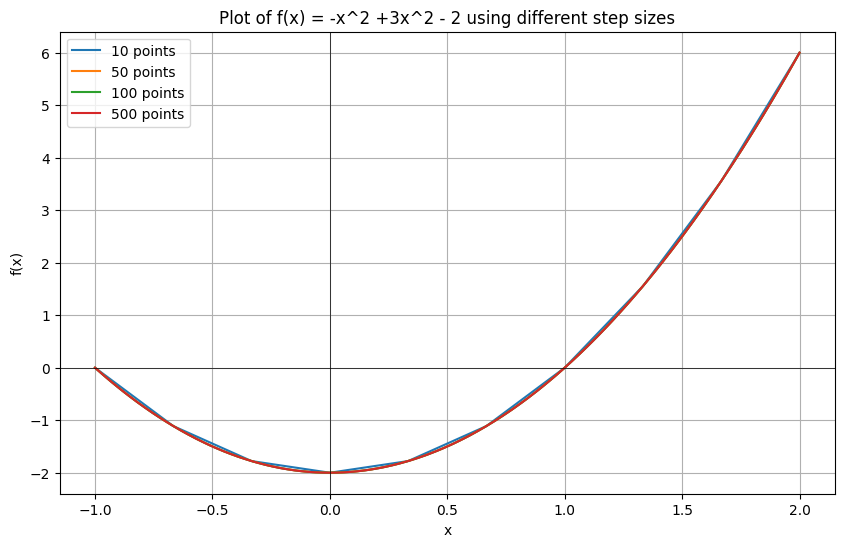

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -1*x**2 +3*x**2 - 2

# Define different step sizes
step_sizes = [10, 50, 100, 500]
x_min, x_max = -1, 2  # Define x-axis range

plt.figure(figsize=(10, 6))

# Loop through step sizes and plot
for steps in step_sizes:
    x_values = np.linspace(x_min, x_max, steps)  # Generate x values
    y_values = f(x_values)  # Compute f(x)
    plt.plot(x_values, y_values, label=f'{steps} points')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Plot of f(x) = -x^2 +3x^2 - 2 using different step sizes")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

As seen above, using more steps provides a more accurate representation of the function.

## 20.2: Finite Difference Approximating Derivatives

In this section, I write a python program demonstrating the concept of Finite Difference Approximating Derivatives.

I use a method called **forward difference**, defined as an estimate of the slope of a function $f(x)$ at $x_j$ using a line that connects the points $(x_j, f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$ defined by

$$
f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1} - x_j}
$$

Using $f(x) = sin(x)$, I use the forward difference method to find an approximation of the graph.

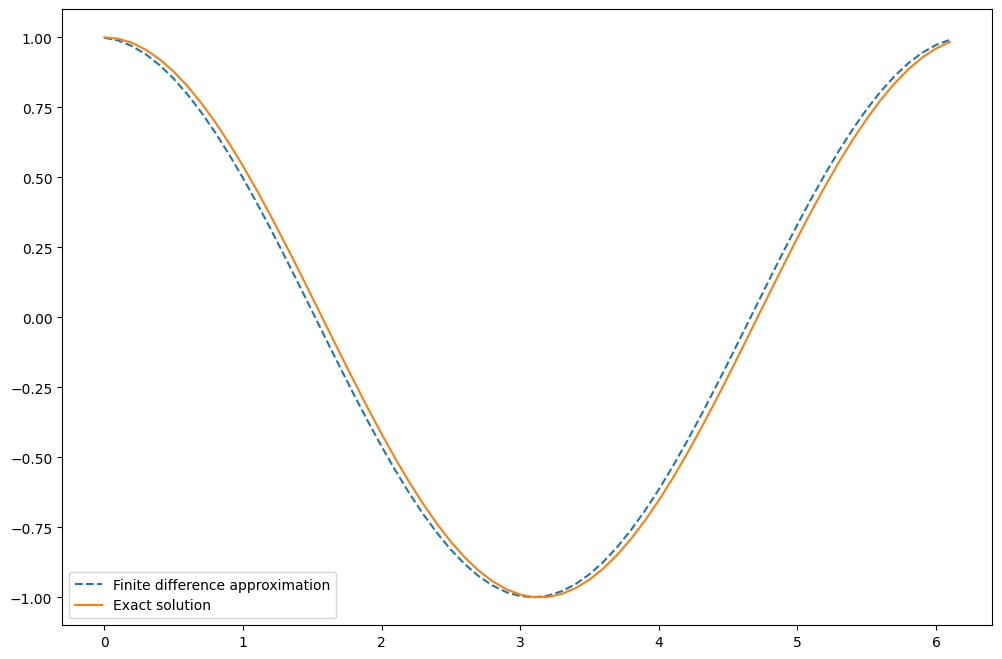

0.04997515074549317


In [10]:
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.sin(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = np.cos(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

## 20.3: Approximating of Higher Order Derivatives

In this section, I use Taylor Series to approximate higher order derivatives

Using Taylor Series, I approximate the second and third derivatives of $f(x) = sin(x)$

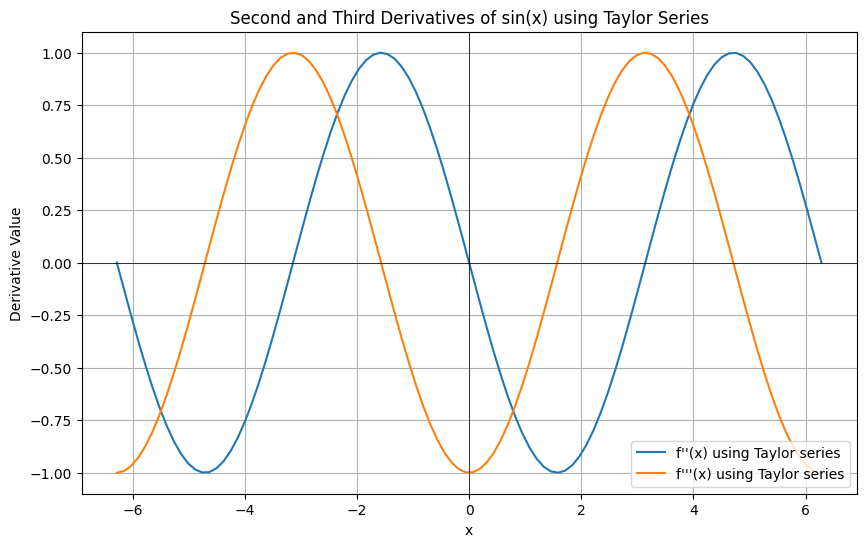

In [12]:
def f(x):
    return np.sin(x)

def taylor_second_derivative(x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

def taylor_third_derivative(x, h):
    return (f(x + 2*h) - 2*f(x + h) + 2*f(x - h) - f(x - 2*h)) / (2*h**3)

# Define step size and range
h = 0.01
x_values = np.linspace(-2*np.pi, 2*np.pi, 100)
second_derivative = [taylor_second_derivative(x, h) for x in x_values]
third_derivative = [taylor_third_derivative(x, h) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, second_derivative, label="f''(x) using Taylor series")
plt.plot(x_values, third_derivative, label="f'''(x) using Taylor series")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Second and Third Derivatives of sin(x) using Taylor Series")
plt.xlabel("x")
plt.ylabel("Derivative Value")
plt.grid(True)
plt.show()

Since we know if $f(x) = sin(x)$, then $f'(x) = cos(x)$, $f''(x) = -sin(x)$, $f'''(x) = -cos(x)$, so the plot above is an accurate representation.